# Linear Regression - Cumulative Lab

## Introduction 

In this cumulative lab you'll perform a full linear regression analysis and report the findings of your final model, including both predictive model performance metrics and interpretation of fitted model parameters.

## Objectives

You will be able to:

* Perform a full linear regression analysis with iterative model development
* Evaluate your final model and interpret its predictive performance metrics
* Apply an inferential lens to interpret relationships between variables identified by the model

## Your Task: Develop a LEGO Pricing Algorithm

![pile of legos](images/legos.jpg)

Photo by <a href="https://unsplash.com/@xavi_cabrera?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Xavi Cabrera</a> on <a href="/s/photos/lego?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You just got hired by LEGO! Your first project is going to be to develop a pricing algorithm to help set a target price for new LEGO sets that are released to market. The goal is to save the company some time and to help ensure consistency in pricing between new products and past products.

The main purpose of this algorithm is *predictive*, meaning that **your model should be able to take in attributes of a LEGO set that does not yet have a set price, and to predict a good price**. The effectiveness of your predictive model will be measured by how well it predicts prices in our test set, where we know what the actual prices were but the model does not.

The secondary purpose of this algorithm is *inferential*, meaning that **your model should be able to tell us something about the relationship between the attributes of a LEGO set and its price**. You will apply your knowledge of statistics to include appropriate caveats about these relationships.

### Data Understanding

You have access to a dataset containing over 700 LEGO sets released in the past, including attributes of those sets as well as their prices. You can assume that the numeric attributes in this dataset have already been preprocessed appropriately for modeling (i.e. that there are no missing or invalid values), while the text attributes are simply there for your visual inspection and should not be used for modeling. Also, note that some of these attributes cannot be used in your analysis because they will be unavailable for future LEGO products or are otherwise irrelevant.

You do not need to worry about inflation or differences in currency; just predict the same kinds of prices as are present in the past data, which have already been converted to USD.

### Loading the Data

In the cells below, we load both the train and test datasets for you. Remember, both of these datasets contain prices, but we are using the test set as a stand-in for future LEGO products where the price has not yet been determined. The model will be trained on just the train set, then we will compare its predictions on the test set to the actual prices on the test set.

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Run this cell without changes

train = pd.read_csv("data/lego_train.csv")
test = pd.read_csv("data/lego_test.csv")

X_train = train.drop("list_price", axis=1)
y_train = train["list_price"]

X_test = test.drop("list_price", axis=1)
y_test = test["list_price"]

X_train

,prod_id,set_name,prod_desc,theme_name,piece_count,min_age,max_age,difficulty_level,num_reviews,star_rating
0,60123,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,7.0,12.0,1,3.0,4.3
1,71246,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,7.0,14.0,1,3.0,4.7
2,10616,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,1.5,5.0,1,3.0,5.0
3,31079,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,8.0,12.0,1,5.0,4.4
4,42057,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,8.0,14.0,1,9.0,4.7
...,...,...,...,...,...,...,...,...,...,...
553,71343,The Powerpuff Girls™ Fun Pack,Save the world before bedtime in the LEGO® DIM...,DIMENSIONS™,56,7.0,14.0,1,1.0,5.0
554,75114,First Order Stormtrooper™,Prepare for battle against the Resistance!,Star Wars™,81,7.0,14.0,0,10.0,4.7
555,41597,Go Brick Me,Build a LEGO® BrickHeadz version of yourself!,BrickHeadz,708,10.0,99.0,2,13.0,4.8
556,75116,Finn,Practice your warrior skills with Finn!,Star Wars™,98,8.0,14.0,1,1.0,5.0


Some more information about the features of this dataset:

In [3]:
# Run this cell without changes
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_id           558 non-null    int64  
 1   set_name          558 non-null    object 
 2   prod_desc         544 non-null    object 
 3   theme_name        558 non-null    object 
 4   piece_count       558 non-null    int64  
 5   min_age           558 non-null    float64
 6   max_age           558 non-null    float64
 7   difficulty_level  558 non-null    int64  
 8   num_reviews       490 non-null    float64
 9   star_rating       490 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 43.7+ KB


A visualization of the distribution of the target variable:

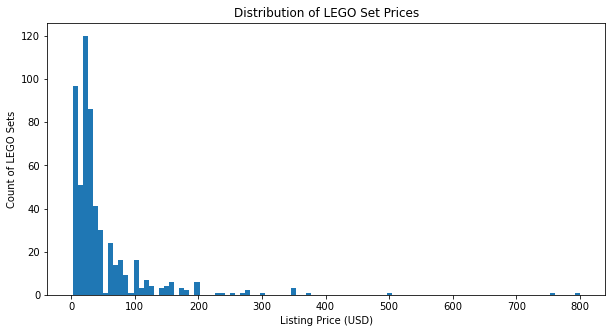

In [4]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of LEGO Sets")
ax.set_title("Distribution of LEGO Set Prices");

### Requirements

#### 1. Interpret a Correlation Heatmap to Build a Baseline Model

You'll start modeling by choosing the feature that is most correlated with our target, and build and evaluate a linear regression model with just that feature.

#### 2. Build a Model with All Relevant Numeric Features

Now, add in the rest of the relevant numeric features of the training data, and compare that model's performance to the performance of the baseline model.

#### 3. Select the Best Combination of Features

Using statistical properties of the fitted model, the `sklearn.feature_selection` submodule, and some custom code, find the combination of relevant numeric features that produces the best scores.

#### 4. Build and Evaluate a Final Predictive Model

Using the best features selected in the previous step, create a final model, fit it on all rows of the training dataset, and evaluate it on all rows of the test dataset in terms of both r-squared and RMSE.

#### 5. Interpret the Final Model

Determine what, if any, understanding of the underlying relationship between variables can be determined with this model. This means you will need to interpret the model coefficients as well as checking whether the assumptions of linear regression have been met.

## 1. Interpret a Correlation Heatmap to Build a Baseline Model

### Interpreting a Correlation Heatmap

The code below produces a heatmap showing the correlations between all of the numeric values in our training data. The x and y axis labels indicate the pair of values that are being compared, and then the color and the number are both representing the correlation. Color is used here to make it easier to find the largest/smallest numbers — you could perform this analysis with just `train.corr()` if all you wanted was the correlation values.

The very left column of the plot is the most important, since it shows correlations between the target (listing price) and other attributes.

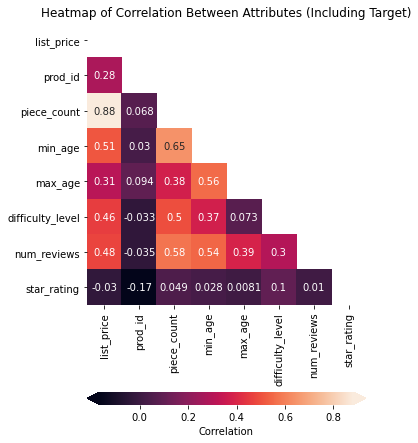

In [5]:
# Run this cell without changes

import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the plot above, which feature is most strongly correlated with the target (`listing_price`)? In other words, which feature has the strongest positive or negative correlation — the correlation with the greatest magnitude?

In [6]:
# Replace None with the name of the feature (a string)

most_correlated_feature = 'piece_count'

(Make sure you run the cell above before proceeding.)

Let's create a scatter plot of that feature vs. listing price:

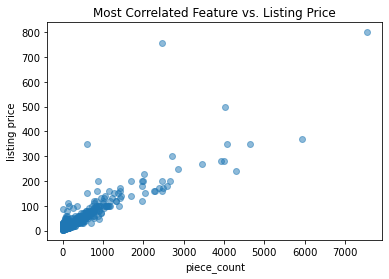

In [7]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

Assuming you correctly identified `piece_count` (the number of pieces in the LEGO set) as the most correlated feature, you should have a scatter plot that shows a fairly clear linear relationship between that feature and the target. It looks like we are ready to proceed with making our baseline model without any additional transformation.

### Building a Baseline Model

Now, we'll build a linear regression model using just that feature, which will serve as our baseline model:

In [8]:
# Run this cell without changes

from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

Then we evaluate the model using `cross_validate` and `ShuffleSplit`, which essentially means that we perform 3 separate train-test splits within our `X_train` and `y_train`, then we find both the train and the test scores for each.

In [9]:
# Run this cell without changes

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.7785726407224942
Validation score: 0.7793473618106956


Interpret these scores below. What are we measuring? What can we learn from this?

**Hint:** when you use `cross_validate`, it uses the `.score` method of the estimator by default. See [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for that method of `LinearRegression`.

In [ ]:
# Replace None with appropriate text
"""
The model has been trained well. We are measuring how the piece count affects listing price. 
"""

## 2. Build a Model with All Numeric Features

Now that we have established a baseline, it's time to move on to more complex models.

### Numeric Feature Selection

One thing that you will almost always need to do in a modeling process is remove non-numeric data prior to modeling. While you could apply more-advanced techniques such as one-hot encoding or NLP in order to convert non-numeric columns into numbers, this time just create a dataframe `X_train_numeric` that is a copy of `X_train` that only contains numeric columns.

You can look at the `df.info()` printout above to do this manually, or there is a handy `.select_dtypes` method ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)).

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_id           558 non-null    int64  
 1   set_name          558 non-null    object 
 2   prod_desc         544 non-null    object 
 3   theme_name        558 non-null    object 
 4   piece_count       558 non-null    int64  
 5   min_age           558 non-null    float64
 6   max_age           558 non-null    float64
 7   difficulty_level  558 non-null    int64  
 8   num_reviews       490 non-null    float64
 9   star_rating       490 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 43.7+ KB


In [18]:
# Replace None with appropriate code

X_train_numeric = X_train.select_dtypes(include= ['int64', 'float64'])

X_train_numeric

,prod_id,piece_count,min_age,max_age,difficulty_level,num_reviews,star_rating
0,60123,330,7.0,12.0,1,3.0,4.3
1,71246,96,7.0,14.0,1,3.0,4.7
2,10616,25,1.5,5.0,1,3.0,5.0
3,31079,379,8.0,12.0,1,5.0,4.4
4,42057,199,8.0,14.0,1,9.0,4.7
...,...,...,...,...,...,...,...
553,71343,56,7.0,14.0,1,1.0,5.0
554,75114,81,7.0,14.0,0,10.0,4.7
555,41597,708,10.0,99.0,2,13.0,4.8
556,75116,98,8.0,14.0,1,1.0,5.0


The following code checks that your answer was correct:

In [19]:
# Run this cell without changes

# X_train_numeric should be a dataframe
assert type(X_train_numeric) == pd.DataFrame

# Check for correct shape
assert X_train_numeric.shape == (558, 7)

Now we can look at scatter plots of all numeric features compared to the target (skipping `piece_count` since we already looked at that earlier):

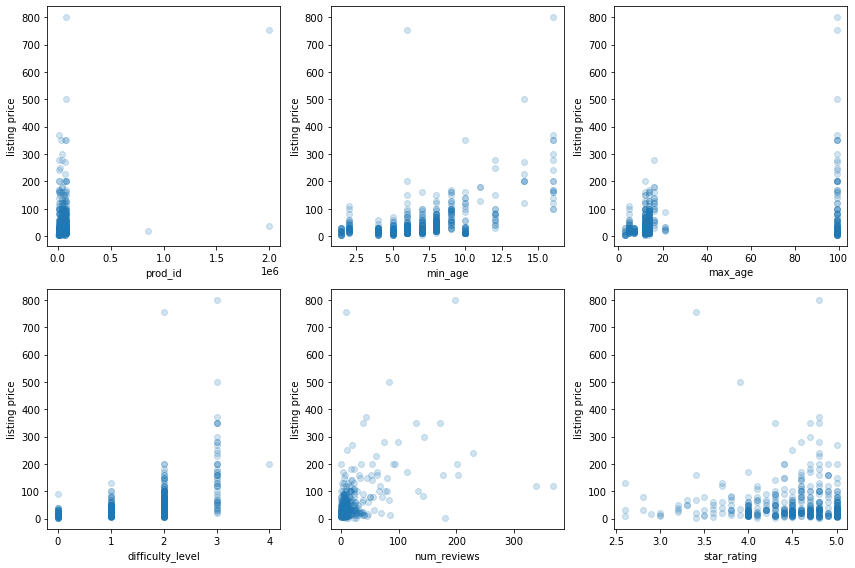

In [20]:
# Run this cell without changes

scatterplot_data = X_train_numeric.drop("piece_count", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

### Feature Selection Using Domain Understanding

Ok, now all of the remaining features can technically go into a model with scikit-learn. But do they make sense?

Some reasons you might not want to include a given numeric column include:

1. The column represents a unique identifier, not an actual numeric feature
2. The column is something that will not be available when making future predictions

Recall that the business purpose here is creating an algorithm to set the price for a newly-released LEGO set. Which columns should we drop because of the issues above?

In [ ]:
# Replace None with appropriate text
"""
prod_id, num_reviews, star_rating
"""

Now, create a variable `X_train_second_model`, which is a copy of `X_train_numeric` where those irrelevant columns have been removed:

In [22]:
# Replace None with appropriate code

X_train_second_model = X_train_numeric.drop(columns = ['prod_id', 'num_reviews', 'star_rating'])

X_train_second_model

,piece_count,min_age,max_age,difficulty_level
0,330,7.0,12.0,1
1,96,7.0,14.0,1
2,25,1.5,5.0,1
3,379,8.0,12.0,1
4,199,8.0,14.0,1
...,...,...,...,...
553,56,7.0,14.0,1
554,81,7.0,14.0,0
555,708,10.0,99.0,2
556,98,8.0,14.0,1


### Building and Evaluating the Second Model

In the cell below, we use the same process to evaluate a model using `X_train_second_model` rather than using just `piece_count`.

In [23]:
# Run this cell without changes

second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7884552982196166
Validation score: 0.755820363666055

Baseline Model
Train score:      0.7785726407224942
Validation score: 0.7793473618106956


Interpret these results. Did our second model perform better than the baseline? Any ideas about why or why not?

**Hint:** because the purpose of this model is to set future prices that have not been determined yet, the most important metric for evaluating model performance is the validation score, not the train score.

In [ ]:
# Replace None with appropriate text
"""
Our second model did not do as well as the first because the validation score is lower. 
"""

## 3. Select the Best Combination of Features

As you likely noted above, adding all relevant numeric features did not actually improve the model performance. Instead, it led to overfitting.

### Investigating Multicollinearity

This potentially indicates that our model is performing poorly because these features violate the independence assumption (i.e. there is strong multicollinearity). In other words, maybe the minimum age, maximum age, and difficulty level are not really providing different information than the number of pieces in the LEGO set, and instead are just adding noise. Then the model is using that noise to get a slightly better score on the training data, but but a worse score on the validation data.

While `LinearRegression` from scikit-learn has a lot of nice functionality for working with a predictive framing (e.g. compatibility with the `cross_validate` function), it doesn't have anything built in to detect strong multicollinearity. Fortunately the same linear regression model is also available from StatsModels ([documentation here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)), where it is called `OLS` (for "ordinary least squares"). Models in StatsModels, including `OLS`, are not really designed for predictive model validation, but they do give us a lot more statistical information.

In the cell below, we use StatsModels to fit and evaluate a linear regression model on the same features used in the second model. Note that we will only see one r-squared value (not train and validation r-squared values) because it is using the full `X_train` dataset instead of using cross-validation.

In [24]:
# Run this cell without changes

import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     506.8
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          2.40e-183
Time:                        13:26:07   Log-Likelihood:                -2741.4
No. Observations:                 558   AIC:                             5493.
Df Residuals:                     553   BIC:                             5514.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               22.0991      4.550      4.857      0.000      13.162      31.037
piece_count          0.0906      0.003     33.407      0.000       0.085       0.096
min_age             -2.7627      0.696     -3.971      0.000      -4.129      -1.396
max_age              0.0501      0.051      0.981      0.327      -0.050       0.150
difficulty_level     3.3626      2.064      1.629      0.104      -0.691       7.416
==============================================================================
Omnibus:                      838.141   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331324.405
Skew:                           8.064   Prob(JB):                         0.00
Kurtosis:                     121.281   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A condition number of 10-30 indicates multicollinearity, and a condition number above 30 indicates strong multicollinearity. This print-out shows a condition number of `2.77e+03`, i.e. 2770, which is well above 30.

In a predictive context (we are currently trying to build a model to assign prices to future LEGO sets, not a model primarily intended for understanding the relationship between prices and attributes of past LEGO sets), we do not *always* need to be worried when we identify strong multicollinearity. Sometimes there are features that are highly collinear but they also are individually communicating useful information to the model. In this case, however, it seems like strong multicollinearity might be what is causing our second model to have worse performance than the first model.

### Selecting Features Based on p-values

Given that we suspect our model's issues are related to multicollinearity, let's try to narrow down those features. In this case, let's use the p-values assigned to the coefficients of the model.

Looking at the model summary above, ***which features are statistically significant, with p-values above 0.05***? (P-values are labeled **P>|t|** in a StatsModels summary.)

In [ ]:
# Replace None with appropriate text
"""
The significant features are the piece_count and minimum age.
"""

**Important note:** There are many limitations to using coefficient p-values to select features. See [this StackExchange answer](https://stats.stackexchange.com/a/291239) with examples in R for more details. The suggested alternative in that answer, `glmnet`, is a form of *regularization*, which you will learn about later. Another related technique is *dimensionality reduction*, which will also be covered later. However for now you can proceed using just the p-values technique until the more-advanced techniques have been covered.

In the cell below, create a list `significant_features` that contains the names of the columns whose features have statistically significant coefficient p-values. You should not include `"const"` in that list because `LinearRegression` from scikit-learn automatically adds a constant term and there is no column of `X_train` called `"const"`.

(You do not need to extract this information programmatically, just write them out like `"column_name_1", "column_name_2"` etc.)

In [25]:
# Replace None with appropriate code
significant_features = ['piece_count', 'min_age']

Now let's build a model using those significant features only:

In [26]:
# Run this cell without changes
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7869252233899845
Validation score: 0.7638761794341223

Second Model
Train score:      0.7884552982196166
Validation score: 0.755820363666055

Baseline Model
Train score:      0.7785726407224942
Validation score: 0.7793473618106956


Interpret the results below. What happened when we removed the features with high p-values?

In [ ]:
# Replace None with appropriate text
"""
This better than second model but not better than the baseline. 
"""

### Selecting Features with `sklearn.feature_selection`

Let's try a different approach. Scikit-learn has a submodule called `feature_selection` that includes tools to help reduce the feature set.

We'll use `RFECV` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [27]:
# Run this cell without changes

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
piece_count: True
min_age: False
max_age: False
difficulty_level: False


Interesting. So, this algorithm is saying that our baseline model, with `piece_count` as the only feature, is the best one it could find.

However, note that this is based on the "importances" of the features, which means the coefficients in the context of a linear regression. It is possible that we can still get a better model by including multiple features, if we try removing columns using a different strategy.

### A Brute Force Approach

Given that we have only four columns and only a few hundred rows, one other option we have is something more computationally expensive: write custom code that goes over multiple different permutations of the columns, to see if we can find something better than the p-values approach or the `RFECV` approach.

The code below assumes that we want to keep the `piece_count` column, then attempts a linear regression with all possible combinations of 1-2 additional features. Don't worry too much if you don't understand everything that is happening here — an approach like this should be a last resort and you may not ever need to use it!

In [38]:
# Run this cell without changes

from itertools import combinations

features = ["piece_count", "min_age", "max_age", "difficulty_level"]

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["piece_count", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["piece_count", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Including all 3 additional features
results_df = results_df.append({
    "min_age": "Yes", "max_age": "Yes", "difficulty_level": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["piece_count"] = "Yes"
results_df.fillna("No", inplace=True)

results_df

,piece_count,min_age,max_age,difficulty_level,train_score,val_score
0,Yes,No,No,No,0.778573,0.779347
1,Yes,Yes,No,No,0.786925,0.763876
2,Yes,No,Yes,No,0.778837,0.780949
3,Yes,No,No,Yes,0.778669,0.780662
4,Yes,Yes,Yes,No,0.788011,0.751768
5,Yes,Yes,No,Yes,0.787145,0.767399
6,Yes,No,Yes,Yes,0.778920,0.781578
7,Yes,Yes,Yes,Yes,0.788455,0.755820


Interpret the table above. It shows both training and validation scores for `piece_count` as well as all combinations of 0, 1, 2, or 3 other features.

Which features make the best model? Which make the worst? How does this align with the previous discussion of multicollinearity? And how much does feature selection seem to matter in general for this dataset + model algorithm, once we have identified the most correlated feature for the baseline?

In [40]:
# Replace None with appropriate text

print(results_df.sort_values(by = 'val_score'))
"""
None
"""

  piece_count min_age max_age difficulty_level  train_score  val_score
4         Yes     Yes     Yes               No     0.788011   0.751768
7         Yes     Yes     Yes              Yes     0.788455   0.755820
1         Yes     Yes      No               No     0.786925   0.763876
5         Yes     Yes      No              Yes     0.787145   0.767399
0         Yes      No      No               No     0.778573   0.779347
3         Yes      No      No              Yes     0.778669   0.780662
2         Yes      No     Yes               No     0.778837   0.780949
6         Yes      No     Yes              Yes     0.778920   0.781578


'\nNone\n'

## 4. Build and Evaluate a Final Predictive Model

In the cell below, create a list `best_features` which contains the names of the best model features based on the findings of the previous step:

In [41]:
# Replace None with appropriate code
best_features = ['piece_count', 'max_age', 'difficulty_level']

Now, we prepare the data for modeling:

In [42]:
# Run this cell without changes
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In the cell below, instantiate a `LinearRegression` model called `final_model`, then fit it on the training data and score it on the test data.

In [62]:
# Replace None with appropriate code

final_model_scores = cross_validate(
    estimator=final_model,
    X=X_train_final,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

# Score the model on X_test_final and y_test
final_model.fit(X_test_final, y_test)

# (use the built-in .score method)

print("Current Model")
print("Train score:     ", final_model_scores["train_score"].mean())
print("Validation score:", final_model_scores["test_score"].mean())

Current Model
Train score:      0.7789201151152363
Validation score: 0.7815780551644038


### User-Friendly Metrics

The score above is an r-squared score. Let's compute the RMSE as well, since this would be more applicable to a business audience.

In [63]:
# Run this cell without changes
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

46.75219225039207

What does this value mean in the current business context?

In [64]:
# Replace None with appropriate text
"""
The lower the number the better the fit.
"""

'\nThe lower the number the better the fit.\n'

## 5. Interpret the Final Model

Below, we display the coefficients and intercept for the final model:

In [65]:
# Run this cell without changes
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

piece_count         0.094059
max_age             0.012508
difficulty_level   -4.939262
Name: Coefficients, dtype: float64

Intercept: 17.661855728676912


Interpret these values below. What is the pricing algorithm you have developed?

In [67]:
# Replace None with appropriate text
"""
Price = .094(piece_count) + .012(max_age) - 4.939(difficulty_level) + 17.66
"""

'\nPrice = .094(piece_count) + .012(max_age) - 4.939(difficulty_level) + 17.66\n'

Before assuming that these coefficients give us inferential insight into past pricing decisions, we should investigate each of the assumptions of linear regression, in order to understand how much our model violates them.

### Investigating Linearity

First, let's check whether the linearity assumption holds.

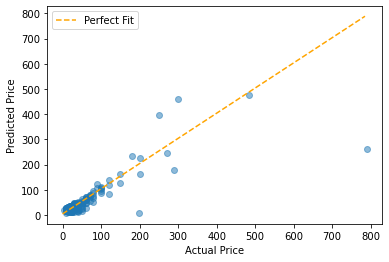

In [66]:
# Run this cell without changes

preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are we violating the linearity assumption?

In [ ]:
# Replace None with appropriate text
"""
We are because of the significant outliers. 
"""

### Investigating Normality

Now let's check whether the normality assumption holds for our model.

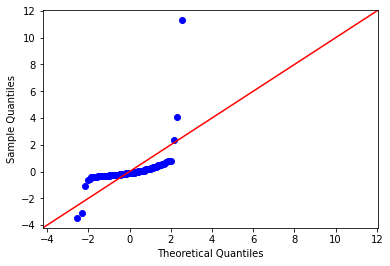

In [68]:
# Run this code without changes
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Are we violating the normality assumption?

In [ ]:
# Replace None with appropriate text
"""
Yes
"""

### Investigating Multicollinearity (Independence Assumption)

Another way to measure multicollinearity is with [variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) ([StatsModels documentation here](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor)). A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

Run the code below to find the VIF for each feature.

In [69]:
# Run this cell without changes
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

piece_count         1.923641
max_age             1.689177
difficulty_level    1.965106
Name: Variance Inflation Factor, dtype: float64

Do we have too high of multicollinearity?

In [ ]:
# Replace None with appropriate text
"""
None
"""

### Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

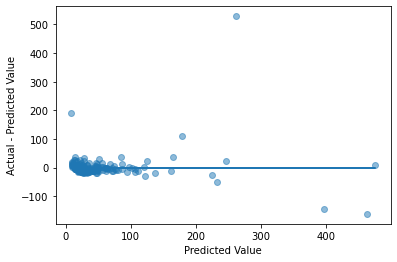

In [70]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Are we violating the homoscedasticity assumption?

In [ ]:
# Replace None with appropriate text
"""
Yes because 
"""

### Linear Regression Assumptions Conclusion

Given your answers above, how should we interpret our model's coefficients? Do we have a model that can be used for inferential as well as predictive purposes? What might your next steps be?

In [ ]:
# Replace None with appropriate text
"""
We do not have a model we can use for predictive purposes. 
"""

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements.